In [319]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import xgboost as xgb

In [320]:
df_train = pd.read_csv(r'train.csv')
df_test = pd.read_csv(r'test.csv')


In [321]:
df_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [322]:
df_test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [323]:
# Display basic information about the dataset
print("Dataset Info:")
print(df_train.info())

# Check for missing values
print("\nMissing Values:")
print(df_train.isnull().sum())

df_train.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

Missing Values:
Item_Iden

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [324]:
# Fill missing values in 'Item_Weight' with the mean
mean_item_weight = df_train['Item_Weight'].mean()
df_train['Item_Weight'].fillna(mean_item_weight, inplace=True)

# Fill missing values in 'Outlet_Size' with the mode
mode_outlet_size = df_train['Outlet_Size'].mode()[0]
df_train['Outlet_Size'].fillna(mode_outlet_size, inplace=True)

# Verify that missing values have been filled
print("Missing Values After Filling:")
print(df_train.isnull().sum())


Missing Values After Filling:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [325]:
# Display basic information about the dataset
print("Dataset Info:")
print(df_train.info())

# Check for missing values
print("\nMissing Values:")
print(df_train.isnull().sum())

df_train.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

Missing Values:
Item_Iden

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.226124         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.857645         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

# Histograms

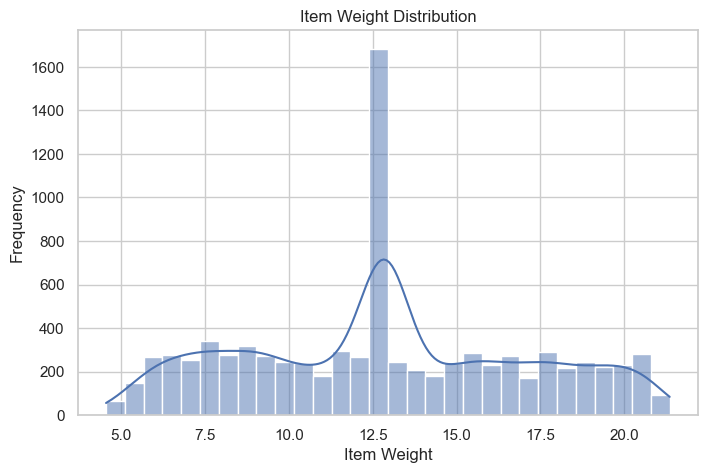

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Item_Weight'
plt.figure(figsize=(8, 5))
sns.histplot(df_train['Item_Weight'], bins=30, kde=True)
plt.title('Item Weight Distribution')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

# Box Plots

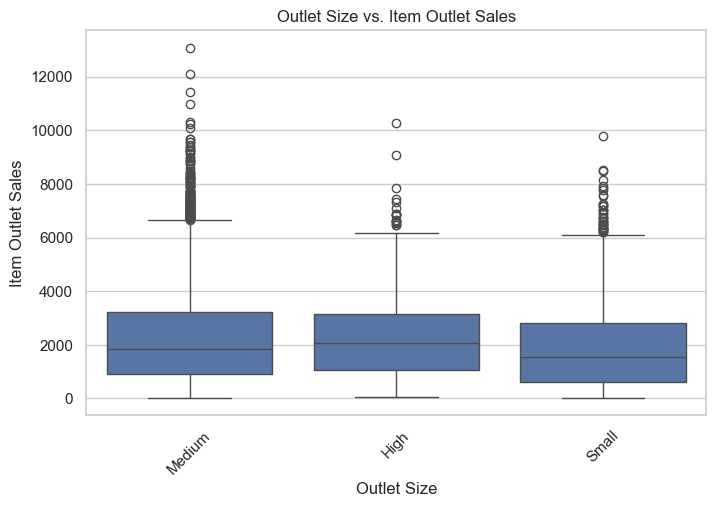

In [327]:
# Box plot for 'Item_MRP'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df_train)
plt.title('Outlet Size vs. Item Outlet Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()


### Box Plots for Categorical Variables

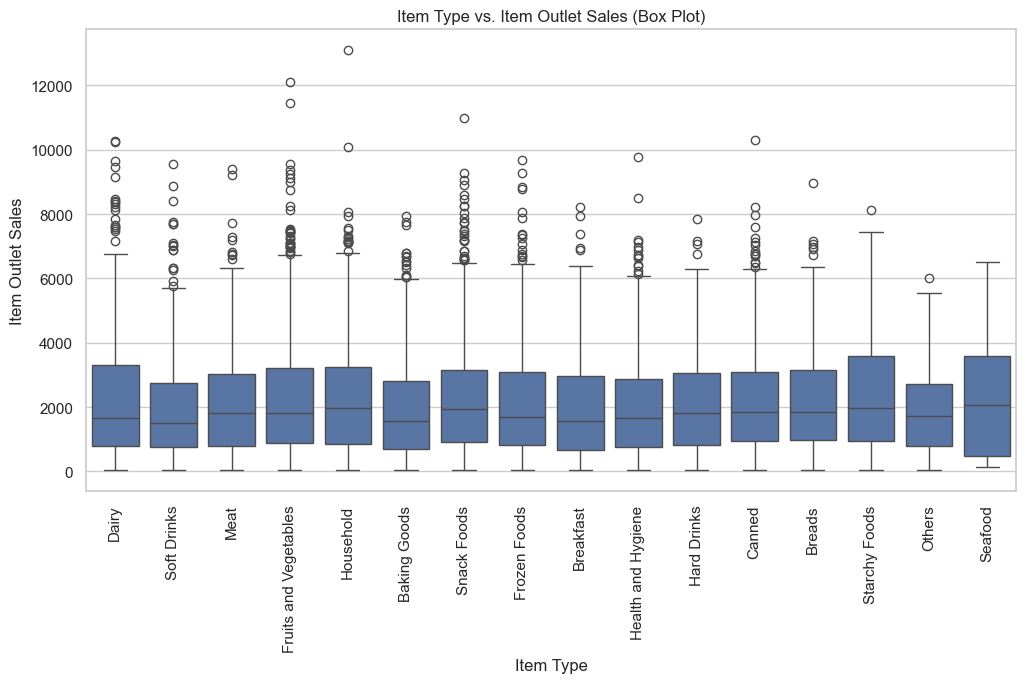

In [328]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df_train)
plt.title('Item Type vs. Item Outlet Sales (Box Plot)')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=90)
plt.show()


# Count Plots

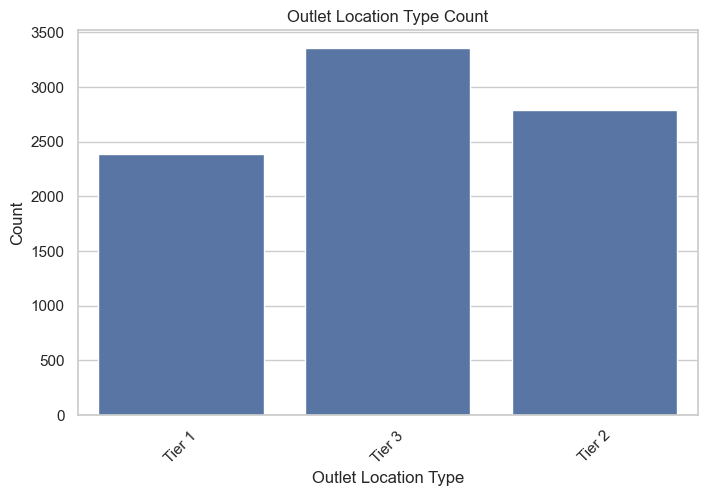

In [329]:
# Count plot for 'Outlet_Location_Type'
plt.figure(figsize=(8, 5))
sns.countplot(x='Outlet_Location_Type', data=df_train)
plt.title('Outlet Location Type Count')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Pair Plots

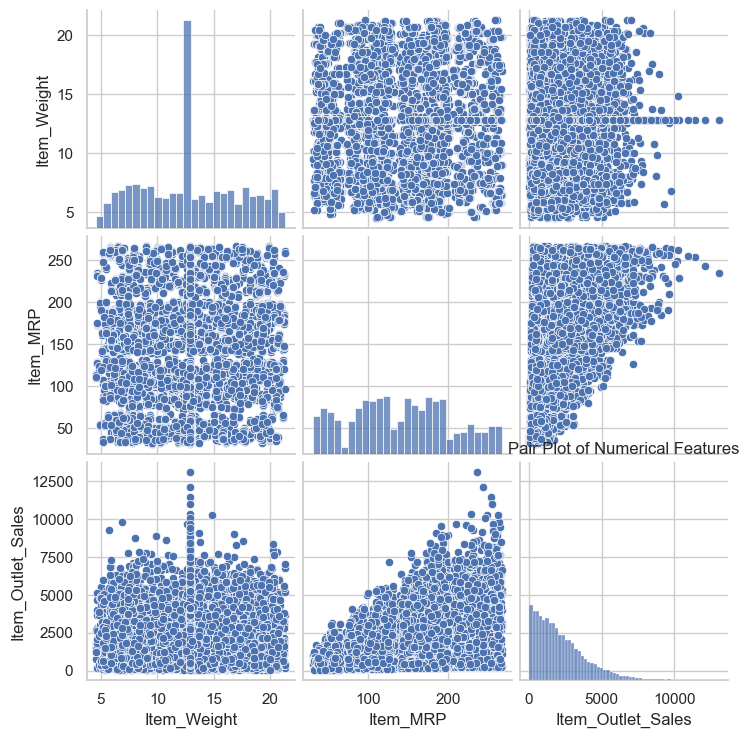

In [330]:
# Pair plot for selected numerical features
num_features = ['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']
sns.pairplot(df_train[num_features])
plt.title('Pair Plot of Numerical Features')
plt.show()


# Correlation Heatmap

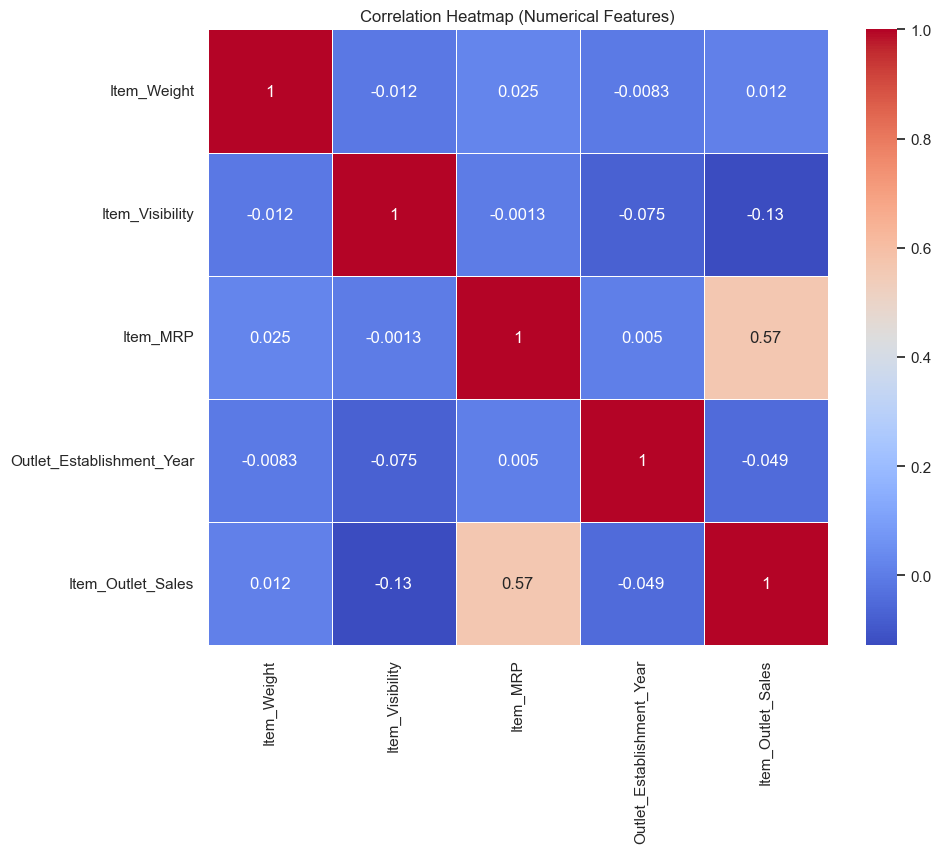

In [331]:
# Select numerical columns for correlation heatmap
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# Create a subset of the DataFrame with numerical columns
subset_df = df_train[numerical_columns]

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = subset_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


# Bar Plots

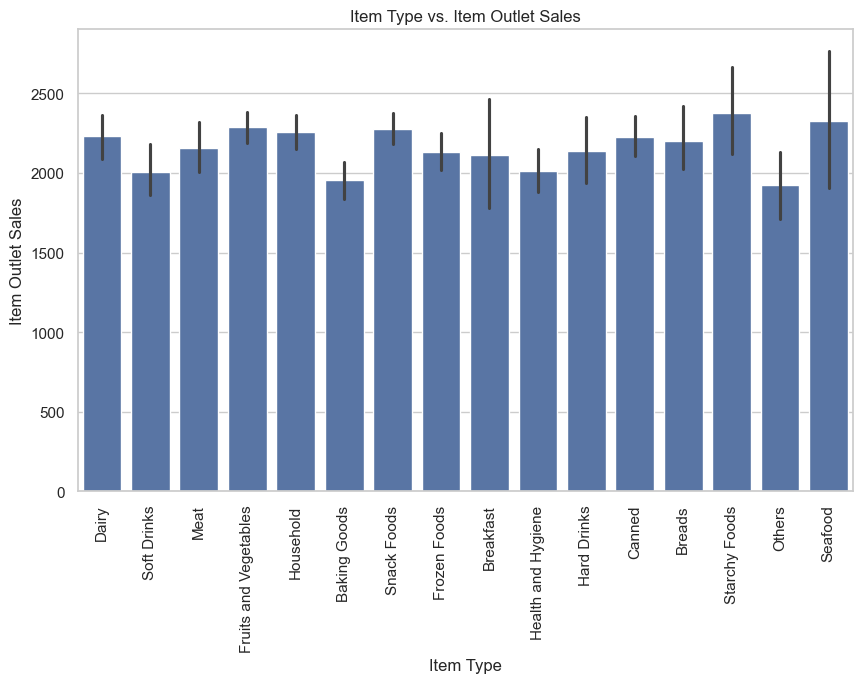

In [332]:
# Bar plot for 'Item_Type' vs. 'Item_Outlet_Sales'
plt.figure(figsize=(10, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df_train)
plt.title('Item Type vs. Item Outlet Sales')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=90)
plt.show()


#  time series plot

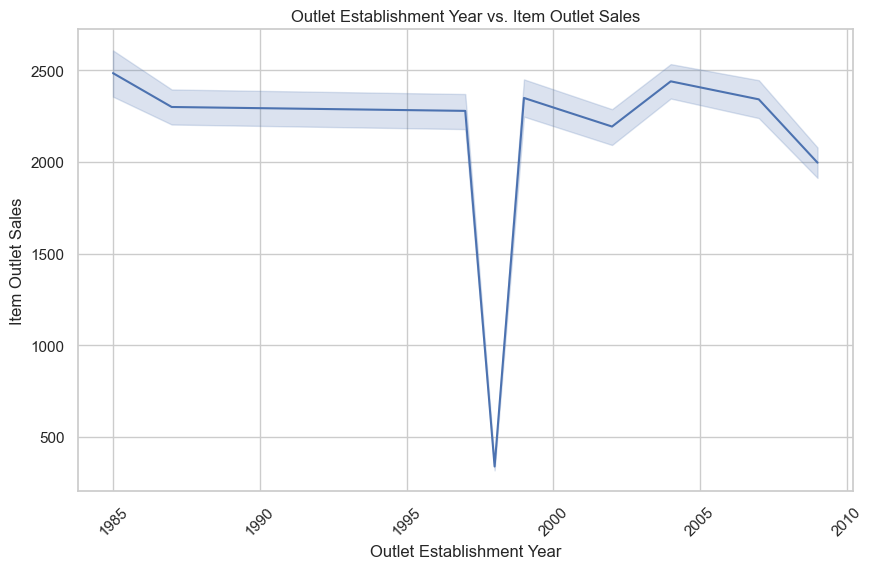

In [333]:
# Line plot for 'Outlet_Establishment_Year' vs. 'Item_Outlet_Sales'
plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df_train)
plt.title('Outlet Establishment Year vs. Item Outlet Sales')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

# Violin Plots for Categorical Variables

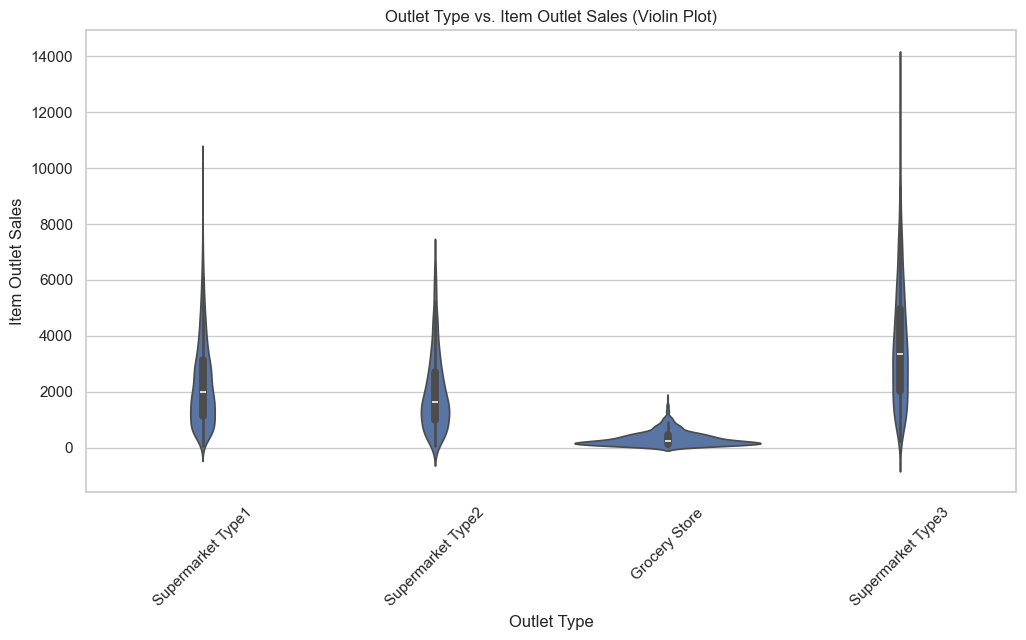

In [334]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df_train)
plt.title('Outlet Type vs. Item Outlet Sales (Violin Plot)')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()


# Scatter Plots for Two Numerical Variables:

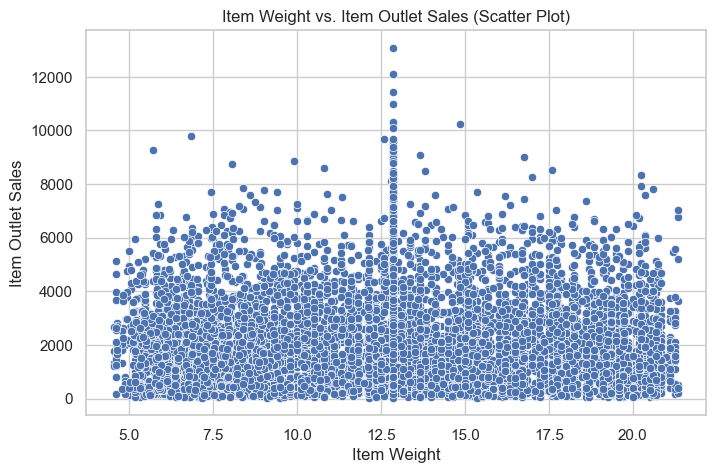

In [335]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df_train)
plt.title('Item Weight vs. Item Outlet Sales (Scatter Plot)')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()


In [336]:
unique_value_counts = df_train.nunique()

# Print the counts
print(unique_value_counts)

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


# Pie Charts for Categorical Variables with Few Unique Values:

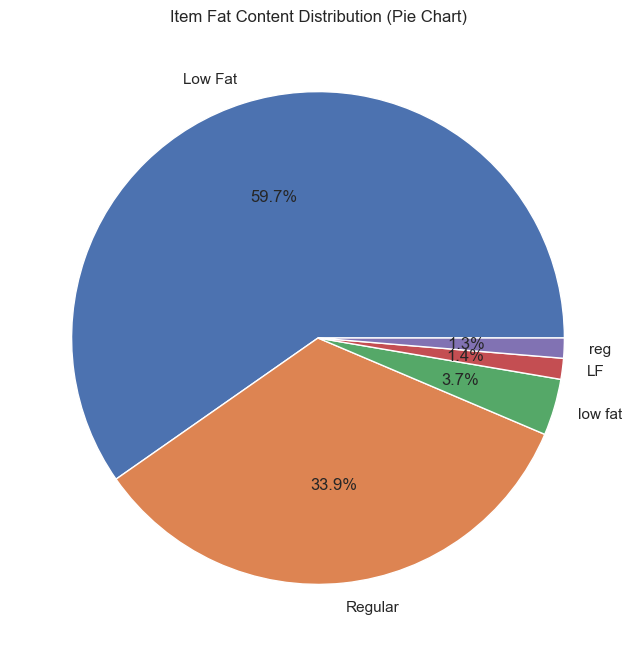

In [337]:
plt.figure(figsize=(8, 8))
plt.pie(df_train['Item_Fat_Content'].value_counts(), labels=df_train['Item_Fat_Content'].unique(), autopct='%1.1f%%')
plt.title('Item Fat Content Distribution (Pie Chart)')
plt.show()


# Bar Plots for Categorical Variables:

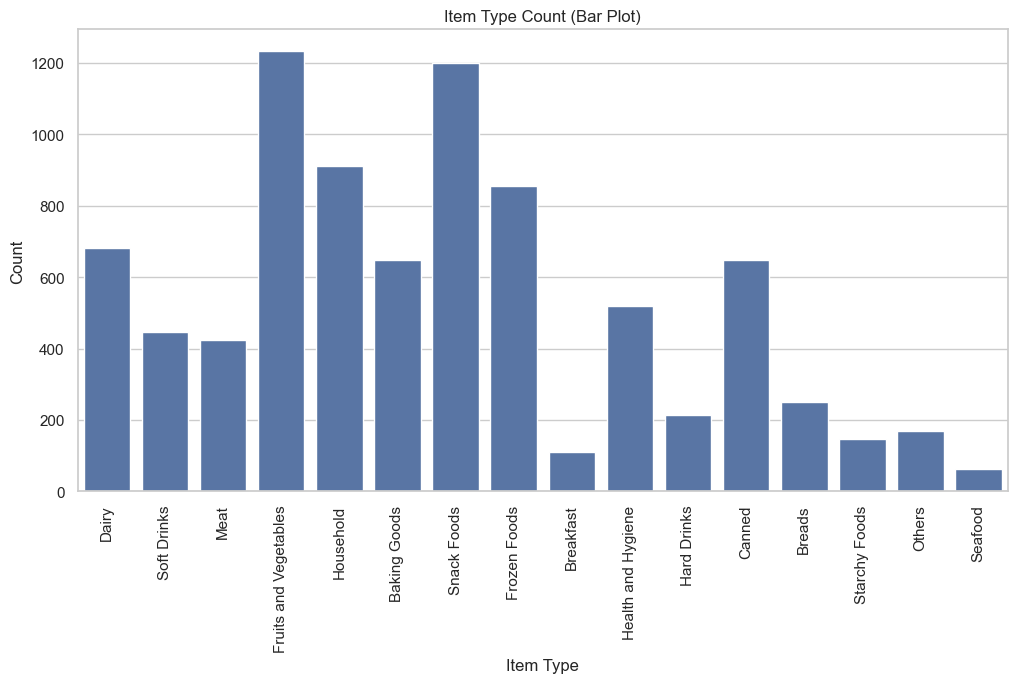

In [338]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Type', data=df_train)
plt.title('Item Type Count (Bar Plot)')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# Histograms for Numerical Variables:

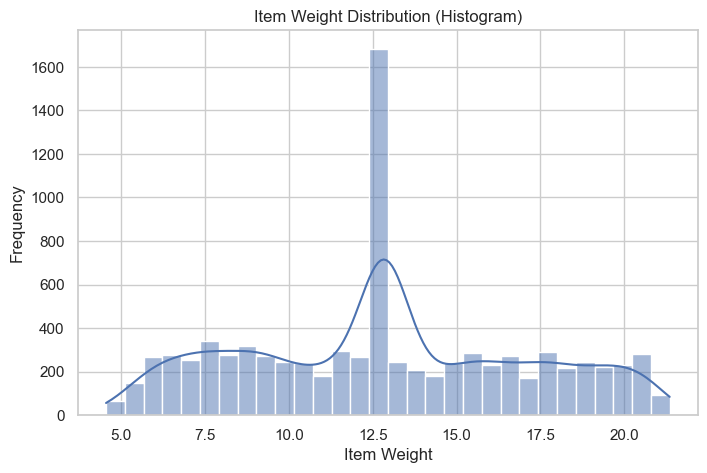

In [339]:
plt.figure(figsize=(8, 5))
sns.histplot(df_train['Item_Weight'], bins=30, kde=True)
plt.title('Item Weight Distribution (Histogram)')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()


# Box Plots for Numerical Variables:

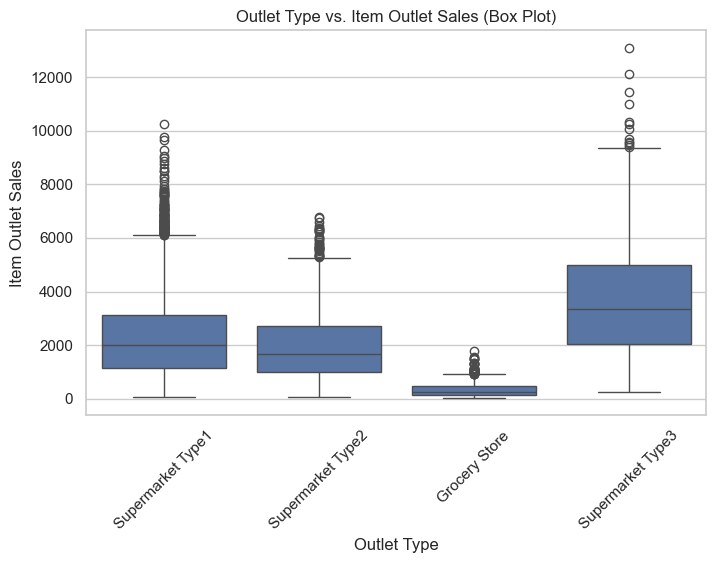

In [340]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df_train)
plt.title('Outlet Type vs. Item Outlet Sales (Box Plot)')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()


# Bar Plots for Counting Categorical Variables:

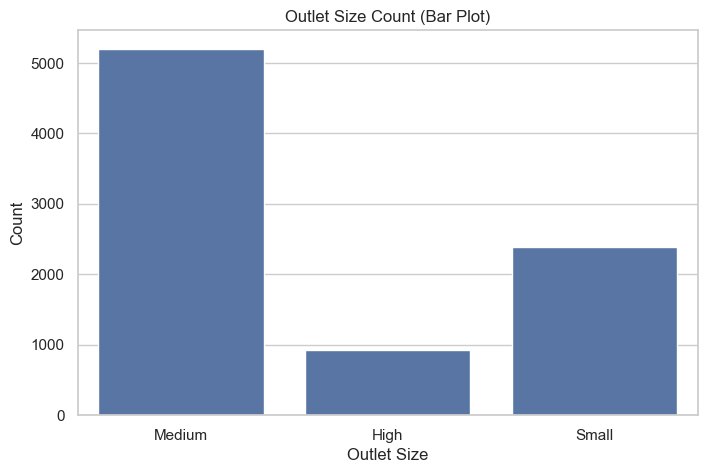

In [341]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Outlet_Size', data=df_train)
plt.title('Outlet Size Count (Bar Plot)')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.show()


# Heatmap for Correlations with Target Variable:

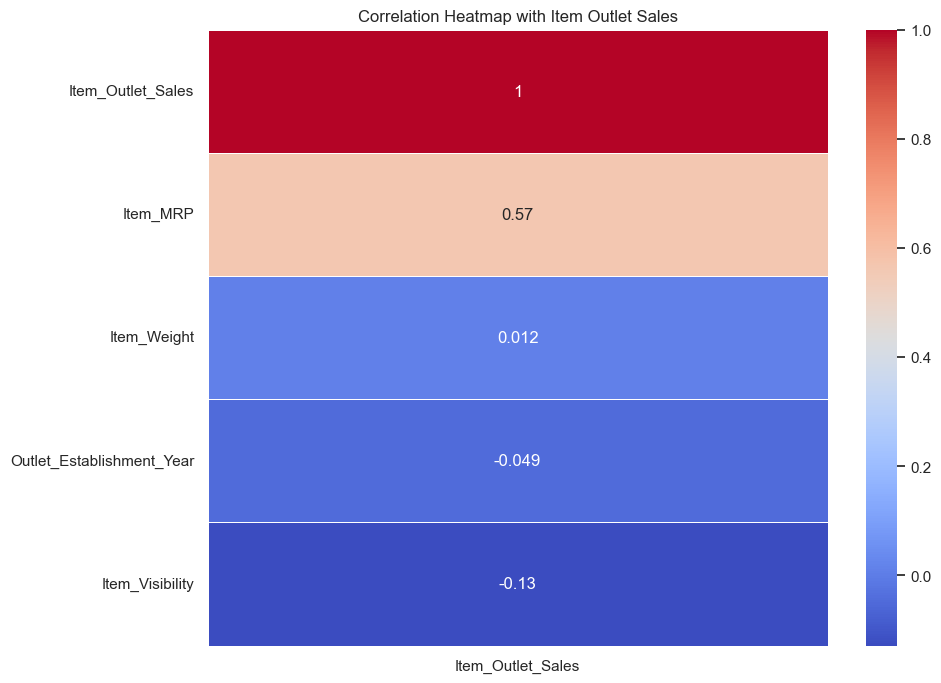

In [342]:
# Select numerical columns for correlation heatmap (excluding non-numeric columns)
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# Create a subset of the DataFrame with numerical columns
subset_df = df_train[numerical_columns]

# Correlation heatmap with the target variable
plt.figure(figsize=(10, 8))
corr_matrix = subset_df.corr()
sns.heatmap(corr_matrix[['Item_Outlet_Sales']].sort_values(by='Item_Outlet_Sales', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Item Outlet Sales')
plt.show()

In [343]:
# Drop the "Item_Identifier" column
df_train.drop("Item_Identifier", axis=1, inplace=True)

# Get a list of columns with more than two unique values
categorical_columns = df_train.select_dtypes(include=['object']).columns
columns_to_encode = [col for col in categorical_columns if df_train[col].nunique() > 2]

# Perform one-hot encoding for the selected columns
df_train = pd.get_dummies(df_train, columns=columns_to_encode)

# Display the first few rows of the updated DataFrame
print(df_train.head())

   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
0          3735.1380                False                      True   
1           443.4228                False                     False   
2          2097.2700                False                      True   
3           732.3800                False                     False   
4           994.7052                False                      True   

   Item_Fat_Content_Regular  Item_Fat_Content_low fat  Item_Fat_Content_reg  \
0                     False                     False        

In [344]:
import pickle

# Save the encoder to a file using pickle
encoder_filename = "encoder.pkl"
with open(encoder_filename, 'wb') as encoder_file:
    pickle.dump(columns_to_encode, encoder_file)

print(f"Encoder saved to {encoder_filename}")

Encoder saved to encoder.pkl


In [345]:
# Get the column names as a list
column_list = df_train.columns.tolist()

# Print the list of columns
print(column_list)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat', 'Item_Fat_Content_reg', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1', 'Outlet_Locat

In [346]:
df_train.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
0          3735.1380                False                      True   
1           443.4228                False                     False   
2          2097.2700                False                      True   
3           732.3800                False                     False   
4           994.7052                False                      True   

   Item_Fat_Content_Regular  Item_Fat_Content_low fat  Item_Fat_Content_reg  \
0                     False                     False                 False   
1                      True                     False                 False   
2                     False                     False                 False   
3                      True                     False                 False   
4                     False                     False                 False   

   ...  Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0  ...             False                True              False   
1  ...             False                True              False   
2  ...             False                True              False   
3  ...             False                True              False   
4  ...              True               False              False   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                         True                        False   
1                        False                        False   
2                         True                        False   
3                        False                        False   
4                        False                        False   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                        False                      False   
1                         True                      False   
2                        False                      False   
3                         True                       True   
4                         True                      False   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                           True                          False   
1                          False                           True   
2                           True                          False   
3                          False                          False   
4                           True                          False   

   Outlet_Type_Supermarket Type3  
0                          False  
1                          False  
2                          False  
3                          False  
4                          False  

[5 rows x 46 columns]

In [347]:
from sklearn.preprocessing import StandardScaler

# Select the features to be standardized
features_to_scale = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])

# Display the first few rows of the updated DataFrame with scaled features
print(df_train.head())


import joblib

# Save the scaler object to a file (e.g., scaler.pkl)
joblib.dump(scaler, 'scaler.pkl')


   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0    -0.841872        -0.970732  1.747454                   0.139541   
1    -1.641706        -0.908111 -1.489023                   1.334103   
2     1.098554        -0.956917  0.010040                   0.139541   
3     1.500838        -1.281758  0.660050                   0.020085   
4    -0.929428        -1.281758 -1.399220                  -1.293934   

   Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
0          3735.1380                False                      True   
1           443.4228                False                     False   
2          2097.2700                False                      True   
3           732.3800                False                     False   
4           994.7052                False                      True   

   Item_Fat_Content_Regular  Item_Fat_Content_low fat  Item_Fat_Content_reg  \
0                     False                     False        

['scaler.pkl']

# same for test

In [348]:
# Fill missing values in 'Item_Weight' with the mean
df_test['Item_Weight'].fillna(mean_item_weight, inplace=True)

# Fill missing values in 'Outlet_Size' with the mode
df_test['Outlet_Size'].fillna(mode_outlet_size, inplace=True)

# Verify that missing values have been filled
print("Missing Values After Filling in df_test:")
print(df_test.isnull().sum())


Missing Values After Filling in df_test:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [349]:
# Drop the "Item_Identifier" column
df_test.drop("Item_Identifier", axis=1, inplace=True)

# Get a list of columns with more than two unique values
categorical_columns_test = df_test.select_dtypes(include=['object']).columns
columns_to_encode_test = [col for col in categorical_columns_test if df_test[col].nunique() > 2]

# Perform one-hot encoding for the selected columns
df_test = pd.get_dummies(df_test, columns=columns_to_encode_test)

# Display the first few rows of the updated DataFrame in df_test
print(df_test.head())


   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0    20.750000         0.007565  107.8622                       1999   
1     8.300000         0.038428   87.3198                       2007   
2    14.600000         0.099575  241.7538                       1998   
3     7.315000         0.015388  155.0340                       2007   
4    12.857645         0.118599  234.2300                       1985   

   Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                False                      True                     False   
1                False                     False                     False   
2                False                      True                     False   
3                False                      True                     False   
4                False                     False                      True   

   Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
0                    

In [350]:
# Standardize the features in df_test using the same scaler used for df_train
features_to_scale_test = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
df_test[features_to_scale_test] = scaler.transform(df_test[features_to_scale_test])


# Training and Testing data

## Split df_train into Features and Target:

In [351]:
# Separate the target variable and features in df_train
X_train = df_train.drop("Item_Outlet_Sales", axis=1)
y_train = df_train["Item_Outlet_Sales"]

In [401]:
# Save the encoded DataFrame to a file using pickle
df_train_encoded_filename = "df_train_encoded.pkl"
with open(df_train_encoded_filename, 'wb') as df_train_encoded_file:
    pickle.dump(X_train, df_train_encoded_file)

print(f"Encoded DataFrame saved to {df_train_encoded_filename}")

Encoded DataFrame saved to df_train_encoded.pkl


In [352]:
# Split the data into training and validation sets (optional)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Model Training

In [353]:
# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val_split, label=y_val_split)

# Define XGBoost parameters
params = {
    "objective": "reg:squarederror",  # Regression task with mean squared error loss
    "eta": 0.1,                      # Learning rate
    "max_depth": 6,                  # Maximum depth of the tree
    "min_child_weight": 1,           # Minimum sum of instance weight (hessian) needed in a child
    "subsample": 0.8,               # Subsample ratio of the training instances
    "colsample_bytree": 0.8,        # Subsample ratio of columns when constructing each tree
    "eval_metric": "rmse",           # Evaluation metric (Root Mean Squared Error)
    "seed": 42                       # Random seed for reproducibility
}


C:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

In [354]:
# Train the XGBoost model
num_round = 100  # Number of boosting rounds (iterations)
model = xgb.train(params, dtrain, num_round, evals=[(dval, "validation")], early_stopping_rounds=10, verbose_eval=True)

[0]	validation-rmse:1610.52657
[1]	validation-rmse:1517.26133
[2]	validation-rmse:1434.41028
[3]	validation-rmse:1365.06896
[4]	validation-rmse:1344.50968
[5]	validation-rmse:1289.78207
[6]	validation-rmse:1242.85794
[7]	validation-rmse:1229.32541
[8]	validation-rmse:1194.38695
[9]	validation-rmse:1164.25120
[10]	validation-rmse:1138.97993
[11]	validation-rmse:1119.00548
[12]	validation-rmse:1101.15746
[13]	validation-rmse:1086.86839
[14]	validation-rmse:1075.71219
[15]	validation-rmse:1072.52250
[16]	validation-rmse:1064.47205
[17]	validation-rmse:1057.22277
[18]	validation-rmse:1055.91311
[19]	validation-rmse:1050.61797
[20]	validation-rmse:1046.00322
[21]	validation-rmse:1041.92001
[22]	validation-rmse:1041.12048
[23]	validation-rmse:1037.71667
[24]	validation-rmse:1035.78071
[25]	validation-rmse:1033.98744
[26]	validation-rmse:1033.81367
[27]	validation-rmse:1032.36936
[28]	validation-rmse:1031.37576
[29]	validation-rmse:1029.64842
[30]	validation-rmse:1030.10040
[31]	validation-rm

In [355]:
y_pred_xgboost = model.predict(dval)

# Model Evaluation

In [356]:
rmse = mean_squared_error(y_val_split, y_pred, squared=False)
print(f"Validation RMSE: {rmse}")

Validation RMSE: 1031.6085175933238


In [357]:
import joblib

# Save the XGBoost model to a file (e.g., xgboost_model.pkl)
joblib.dump(xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

# Lets use Random forest, lasso and ridge regression

# Random Forest

In [358]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separate the target variable and features in df_train
X_train = df_train.drop("Item_Outlet_Sales", axis=1)
y_train = df_train["Item_Outlet_Sales"]

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set (optional)
y_pred_rf = rf_model.predict(X_val_split)

# Calculate RMSE and R-squared on the validation set (optional)
rmse_rf = mean_squared_error(y_val_split, y_pred_rf, squared=False)
r2_rf = r2_score(y_val_split, y_pred_rf)

print(f"Random Forest Validation RMSE: {rmse_rf}")
print(f"Random Forest Validation R-squared: {r2_rf}")


Random Forest Validation RMSE: 412.5656373477465
Random Forest Validation R-squared: 0.9373759088774561


# Lasso Regression:

In [359]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Separate the target variable and features in df_train
X_train = df_train.drop("Item_Outlet_Sales", axis=1)
y_train = df_train["Item_Outlet_Sales"]

# Initialize the Lasso Regressor
lasso_model = Lasso(alpha=1.0, random_state=42)

# Standardize the features (if not already done)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the model
lasso_model.fit(X_train_scaled, y_train)



C:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.146e+07, tolerance: 2.482e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(random_state=42)

# Ridge Regression:

In [360]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Separate the target variable and features in df_train
X_train = df_train.drop("Item_Outlet_Sales", axis=1)
y_train = df_train["Item_Outlet_Sales"]

# Initialize the Ridge Regressor
ridge_model = Ridge(alpha=1.0, random_state=42)

# Standardize the features (if not already done)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the model
ridge_model.fit(X_train_scaled, y_train)


Ridge(random_state=42)

# save models

In [361]:
import joblib

# Save the XGBoost model as a .pkl file
joblib.dump(model, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [362]:
import joblib

# Save the Random Forest model as a .pkl file
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [363]:
import joblib

# Save the Lasso Regression model as a .pkl file
joblib.dump(lasso_model, 'lasso_regression_model.pkl')


['lasso_regression_model.pkl']

In [364]:
# Save the Ridge Regression model to a file (e.g., ridge_model.pkl)
joblib.dump(ridge_model, 'ridge_model.pkl')


['ridge_model.pkl']

# Comparing models

In [365]:
from sklearn.metrics import mean_squared_error, r2_score

# Load the trained models (if not already loaded)
import joblib

# Load the XGBoost model
xgboost_model = joblib.load('xgboost_model.pkl')

# Load the Random Forest model
random_forest_model = joblib.load('random_forest_model.pkl')

# Load the Lasso Regression model
lasso_regression_model = joblib.load('lasso_regression_model.pkl')

# Load the Ridge Regression model
ridge_regression_model = joblib.load('ridge_model.pkl')

# Make predictions on the validation set using each model
y_pred_xgboost = xgboost_model.predict(dval)
y_pred_rf = random_forest_model.predict(X_val_split)
y_pred_lasso = lasso_regression_model.predict(X_val_split)
y_pred_ridge = ridge_regression_model.predict(X_val_split)

# Calculate RMSE for each model
rmse_xgboost = mean_squared_error(y_val_split, y_pred_xgboost, squared=False)
rmse_rf = mean_squared_error(y_val_split, y_pred_rf, squared=False)
rmse_lasso = mean_squared_error(y_val_split, y_pred_lasso, squared=False)
rmse_ridge = mean_squared_error(y_val_split, y_pred_ridge, squared=False)

# Calculate R-squared for each model
r2_xgboost = r2_score(y_val_split, y_pred_xgboost)
r2_rf = r2_score(y_val_split, y_pred_rf)
r2_lasso = r2_score(y_val_split, y_pred_lasso)
r2_ridge = r2_score(y_val_split, y_pred_ridge)

# Print the results
print("Model Comparisons on Validation Set:")
print(f"XGBoost RMSE: {rmse_xgboost}, R-squared: {r2_xgboost}")
print(f"Random Forest RMSE: {rmse_rf}, R-squared: {r2_rf}")
print(f"Lasso Regression RMSE: {rmse_lasso}, R-squared: {r2_lasso}")
print(f"Ridge Regression RMSE: {rmse_ridge}, R-squared: {r2_ridge}")


Model Comparisons on Validation Set:
XGBoost RMSE: 1031.6085175933238, R-squared: 0.6084518565372534
Random Forest RMSE: 412.5656373477465, R-squared: 0.9373759088774561
Lasso Regression RMSE: 1207.2491022080023, R-squared: 0.4637724628821118
Ridge Regression RMSE: 1209.3483632774464, R-squared: 0.46190597103140285


C:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
C:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


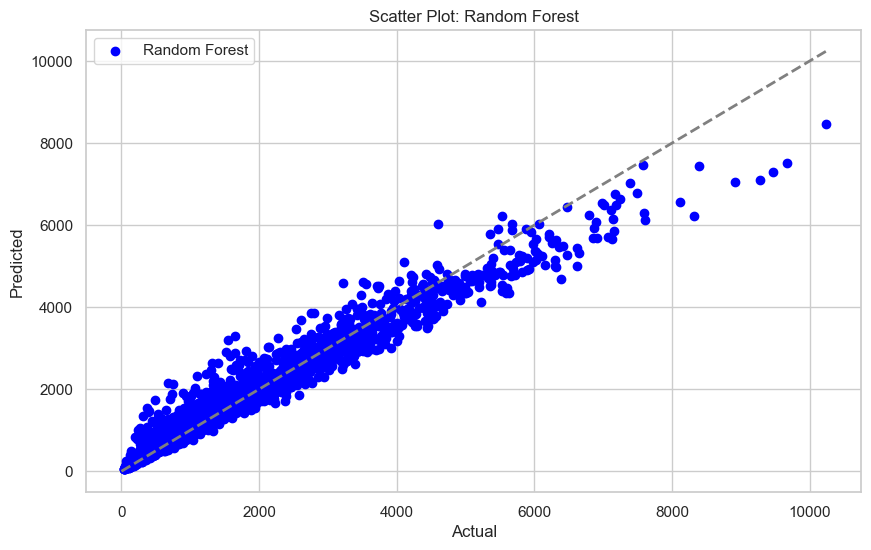

In [366]:
import matplotlib.pyplot as plt

# Scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_val_split, y_pred_rf, color='blue', label='Random Forest')
plt.plot([0, max(y_val_split)], [0, max(y_val_split)], color='gray', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot: Random Forest')
plt.legend()
plt.show()


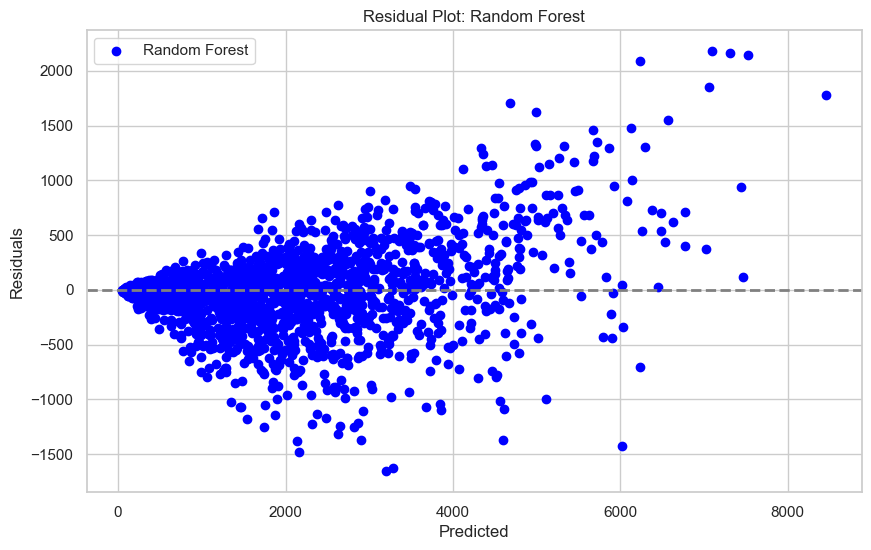

In [367]:
# Residual plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, y_val_split - y_pred_rf, color='blue', label='Random Forest')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot: Random Forest')
plt.legend()
plt.show()


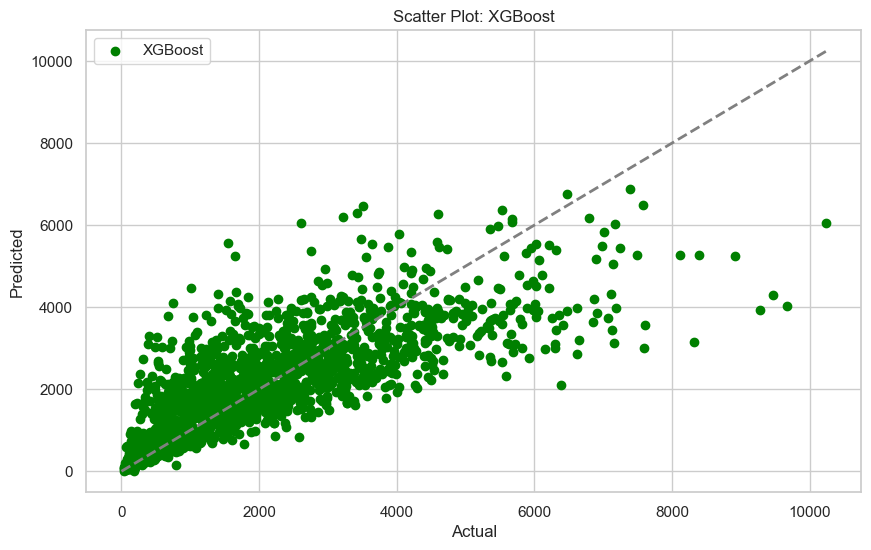

In [368]:
import matplotlib.pyplot as plt

# Scatter plot for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_val_split, y_pred_xgboost, color='green', label='XGBoost')
plt.plot([0, max(y_val_split)], [0, max(y_val_split)], color='gray', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot: XGBoost')
plt.legend()
plt.show()


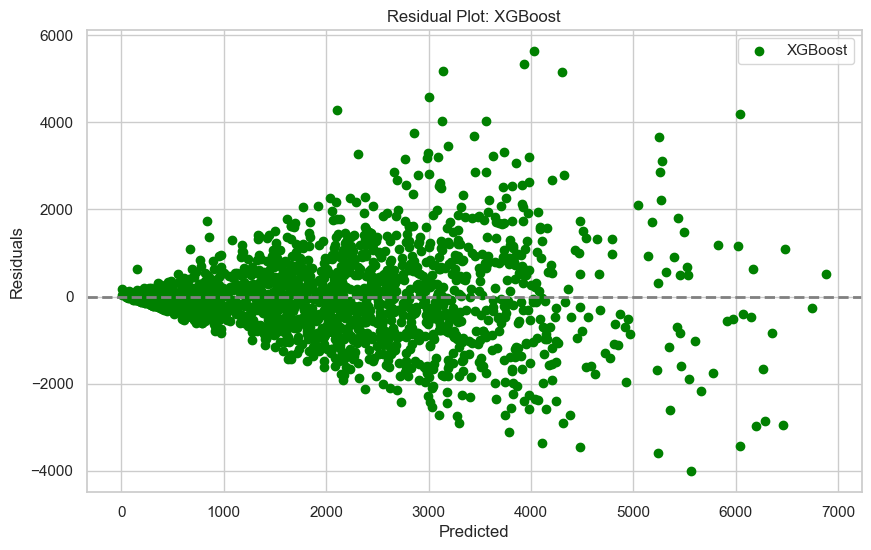

In [369]:
# Residual plot for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgboost, y_val_split - y_pred_xgboost, color='green', label='XGBoost')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot: XGBoost')
plt.legend()
plt.show()


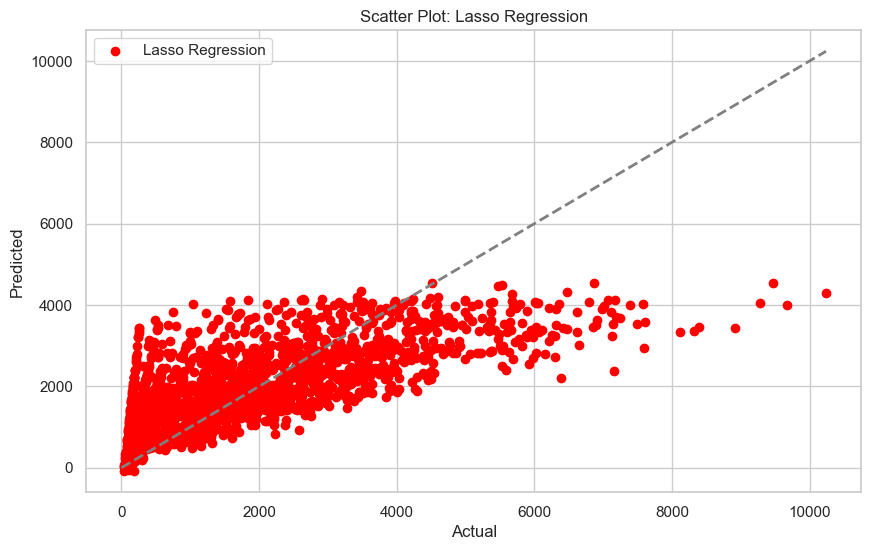

In [370]:
import matplotlib.pyplot as plt

# Scatter plot for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_val_split, y_pred_lasso, color='red', label='Lasso Regression')
plt.plot([0, max(y_val_split)], [0, max(y_val_split)], color='gray', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot: Lasso Regression')
plt.legend()
plt.show()


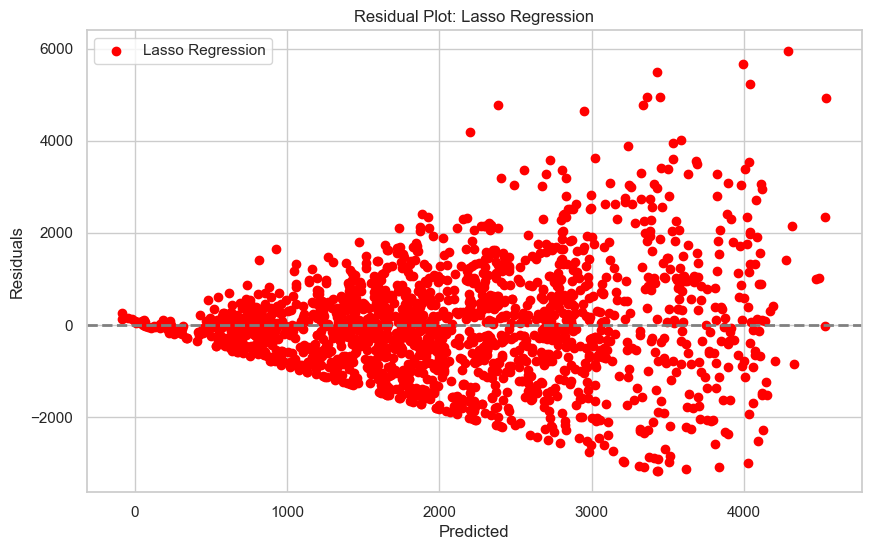

In [371]:
# Residual plot for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lasso, y_val_split - y_pred_lasso, color='red', label='Lasso Regression')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot: Lasso Regression')
plt.legend()
plt.show()


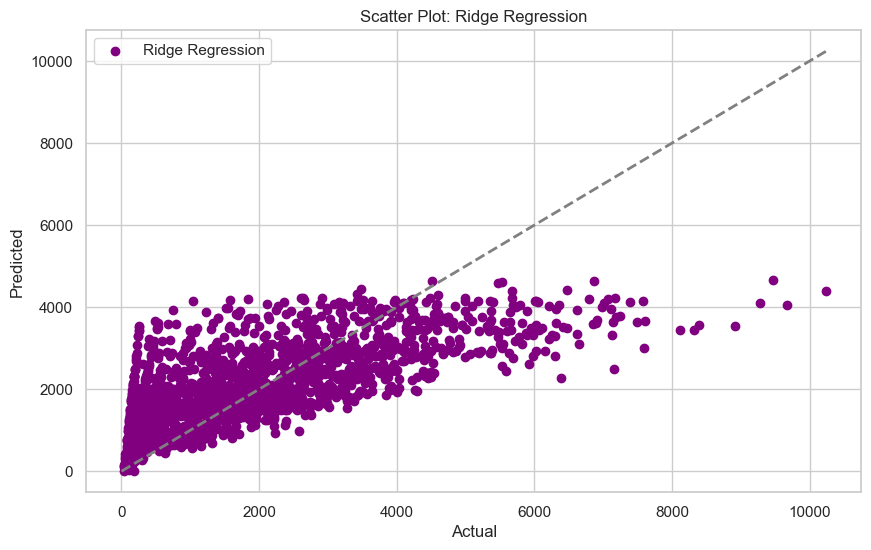

In [372]:
import matplotlib.pyplot as plt

# Scatter plot for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_val_split, y_pred_ridge, color='purple', label='Ridge Regression')
plt.plot([0, max(y_val_split)], [0, max(y_val_split)], color='gray', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot: Ridge Regression')
plt.legend()
plt.show()


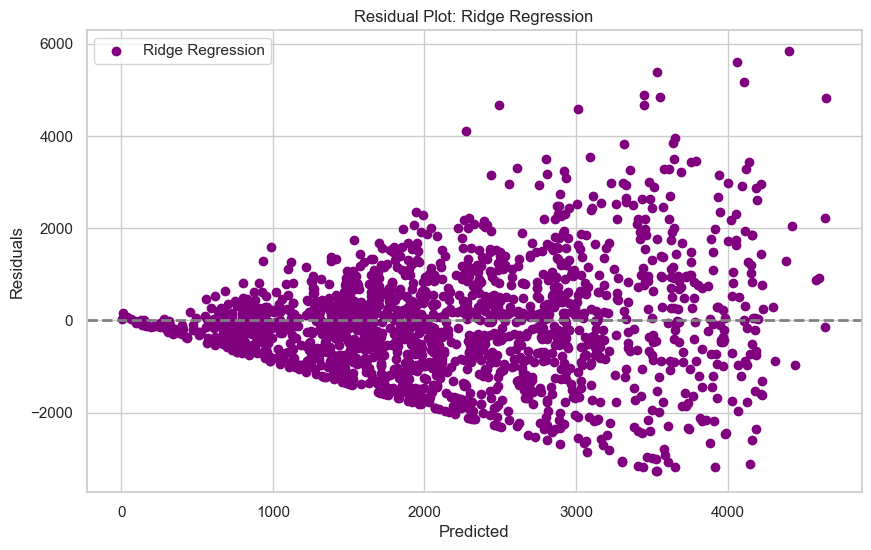

In [373]:
# Residual plot for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, y_val_split - y_pred_ridge, color='purple', label='Ridge Regression')
plt.axhline(y=0, color='gray', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot: Ridge Regression')
plt.legend()
plt.show()


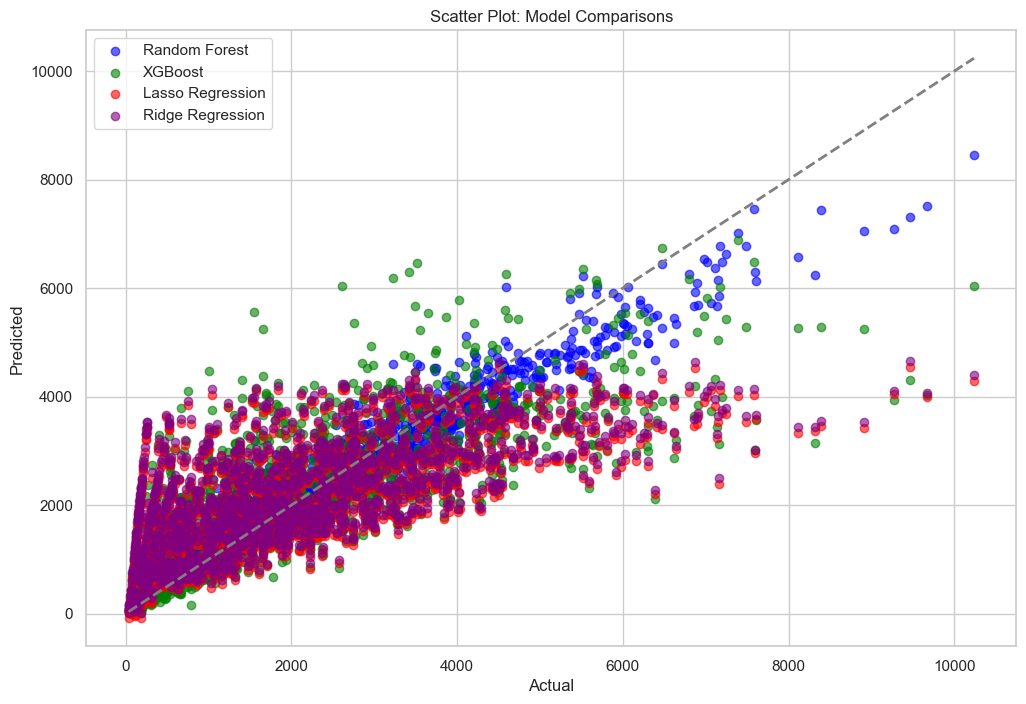

In [374]:
import matplotlib.pyplot as plt

# Create a figure and axis for the scatter plot
plt.figure(figsize=(12, 8))

# Scatter plots for each model
plt.scatter(y_val_split, y_pred_rf, color='blue', label='Random Forest', alpha=0.6)
plt.scatter(y_val_split, y_pred_xgboost, color='green', label='XGBoost', alpha=0.6)
plt.scatter(y_val_split, y_pred_lasso, color='red', label='Lasso Regression', alpha=0.6)
plt.scatter(y_val_split, y_pred_ridge, color='purple', label='Ridge Regression', alpha=0.6)

# Plot the diagonal line (perfect predictions)
plt.plot([min(y_val_split), max(y_val_split)], [min(y_val_split), max(y_val_split)], color='gray', linestyle='--', lw=2)

# Set labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot: Model Comparisons')

# Add legend
plt.legend()

# Show the plot
plt.show()


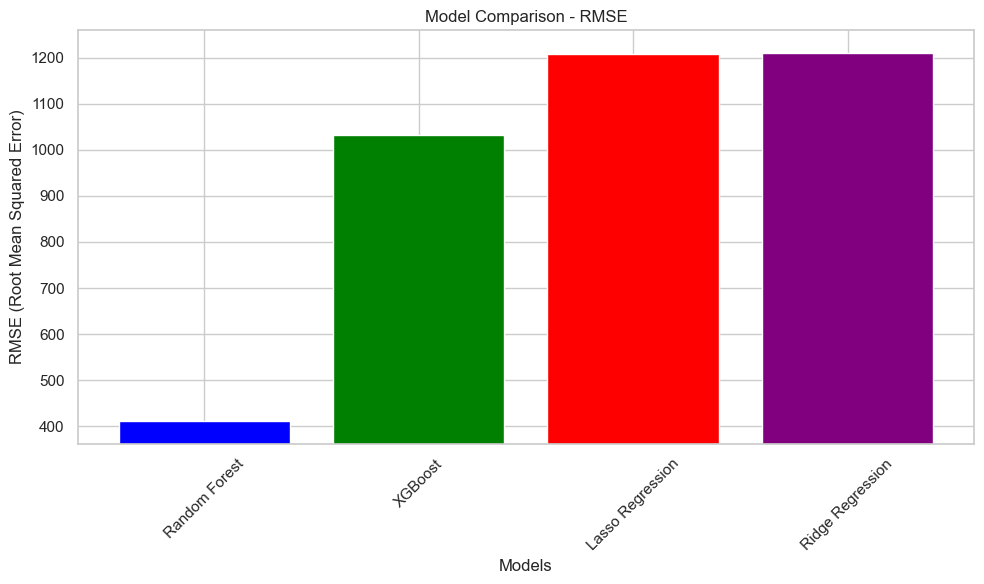

In [375]:
import matplotlib.pyplot as plt

# RMSE values for each model
rmse_values = [rmse_rf, rmse_xgboost, rmse_lasso, rmse_ridge]

# Model names
models = ['Random Forest', 'XGBoost', 'Lasso Regression', 'Ridge Regression']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('RMSE (Root Mean Squared Error)')
plt.title('Model Comparison - RMSE')
plt.ylim(min(rmse_values) - 50, max(rmse_values) + 50)  # Adjust the y-axis limits for better visualization
plt.xticks(rotation=45)  # Rotate the model names for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [376]:
# Make predictions on df_test using the Random Forest model
y_pred_test_rf = random_forest_model.predict(df_test)

# Create a DataFrame with the features and predicted 'Item_Outlet_Sales'
result_df = df_test.copy()
result_df['Item_Outlet_Sales'] = y_pred_test_rf

# Save the result as a CSV file
result_df.to_csv('result.csv', index=False)

In [377]:
# Load the original df_test without preprocessing
original_df_test = pd.read_csv('Test - Copy.csv')  # Replace with the actual path

# Load the predicted results from result.csv
predicted_results = pd.read_csv('result.csv')

# Add the 'Item_Outlet_Sales' column from predicted_results to the original_df_test
original_df_test['Item_Outlet_Sales'] = predicted_results['Item_Outlet_Sales']

# Save the updated DataFrame as a new CSV file
original_df_test.to_csv('result_original.csv', index=False)


In [378]:
final_result = pd.read_csv('result_original.csv')

In [379]:
final_result.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1        1808.299484  
1               Tier 2  Supermarket Type1        1186.568786  
2               Tier 3      Grocery Store         594.179894  
3               Tier 2  Supermarket Type1        2270.298104  
4               Tier 3  Supermarket Type3        6412.732596

# visualization on result

In [380]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the result_original.csv file
final_result = pd.read_csv('result_original.csv')

# Set style for plots
sns.set(style="whitegrid")

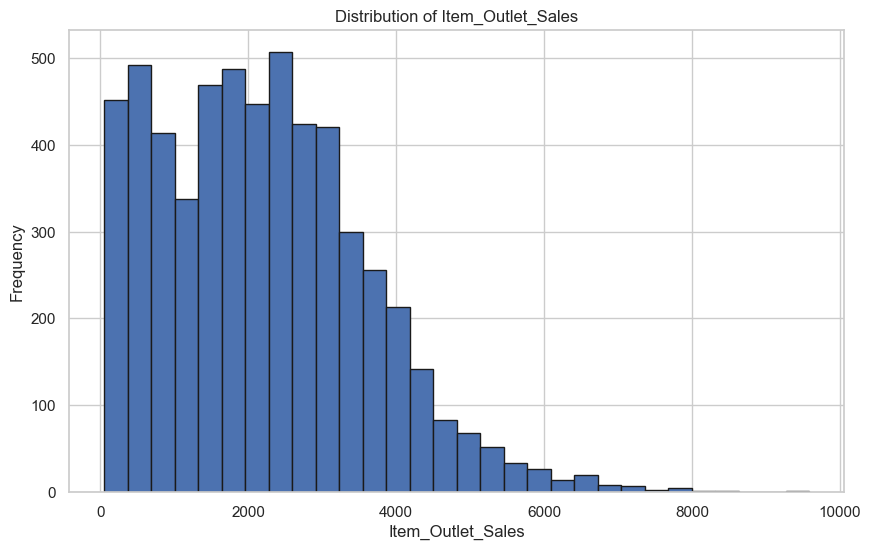

In [381]:
# 1. Histogram of Item_Outlet_Sales
plt.figure(figsize=(10, 6))
plt.hist(final_result['Item_Outlet_Sales'], bins=30, edgecolor='k')
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()

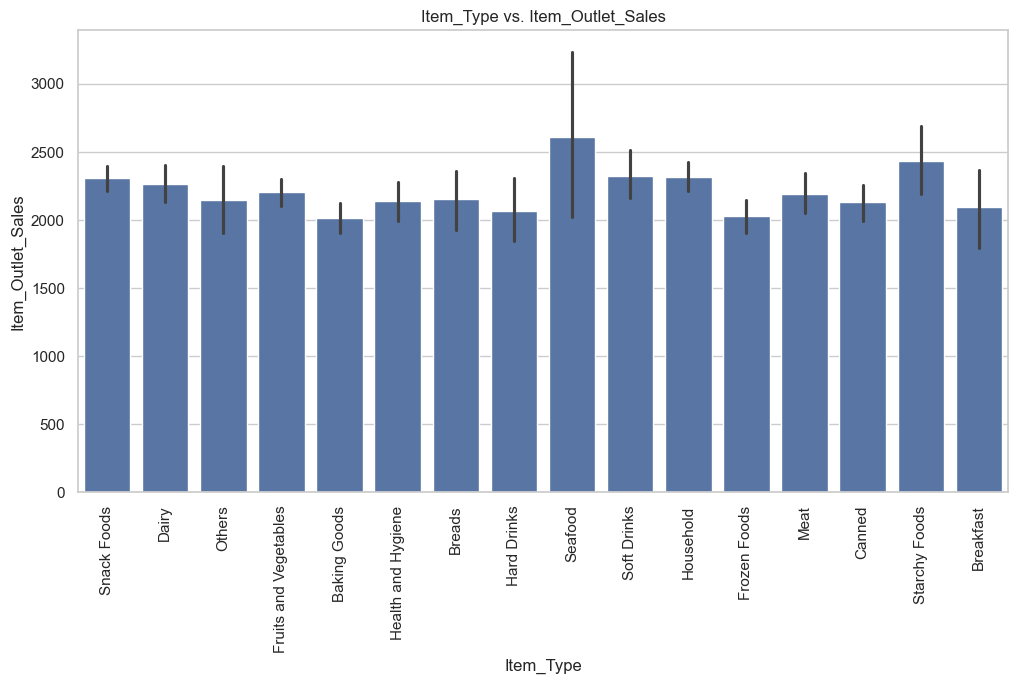

In [382]:
# 2. Item_Type vs. Item_Outlet_Sales (Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=final_result)
plt.title('Item_Type vs. Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

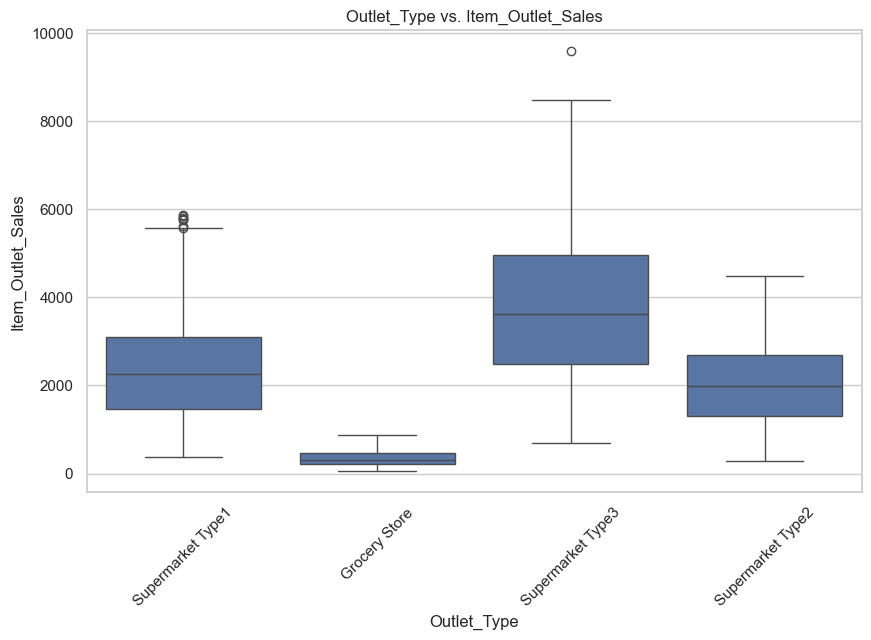

In [383]:
# 3. Outlet_Type vs. Item_Outlet_Sales (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=final_result)
plt.title('Outlet_Type vs. Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

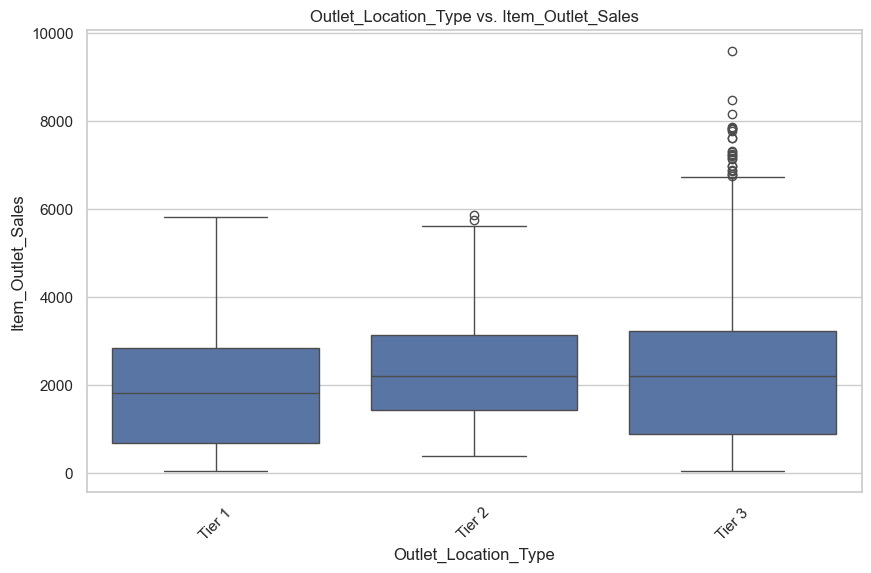

In [384]:
# 4. Outlet_Location_Type vs. Item_Outlet_Sales (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=final_result)
plt.title('Outlet_Location_Type vs. Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

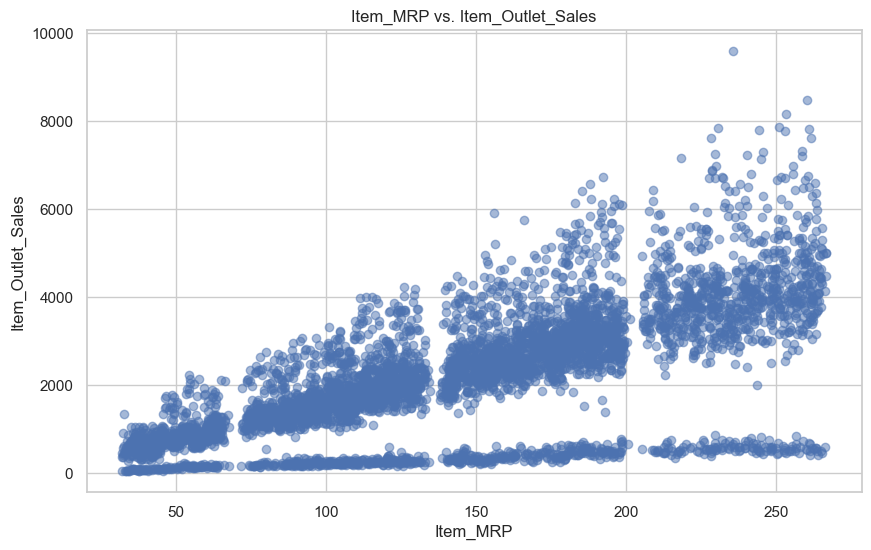

In [385]:
# 5. Item_MRP vs. Item_Outlet_Sales (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(final_result['Item_MRP'], final_result['Item_Outlet_Sales'], alpha=0.5)
plt.title('Item_MRP vs. Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

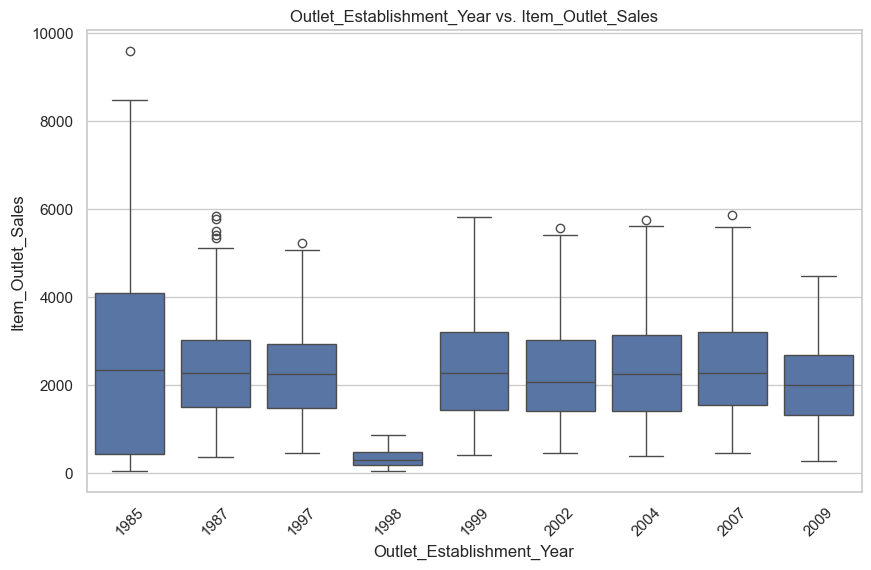

In [386]:
# 6. Outlet_Establishment_Year vs. Item_Outlet_Sales (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=final_result)
plt.title('Outlet_Establishment_Year vs. Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.show()

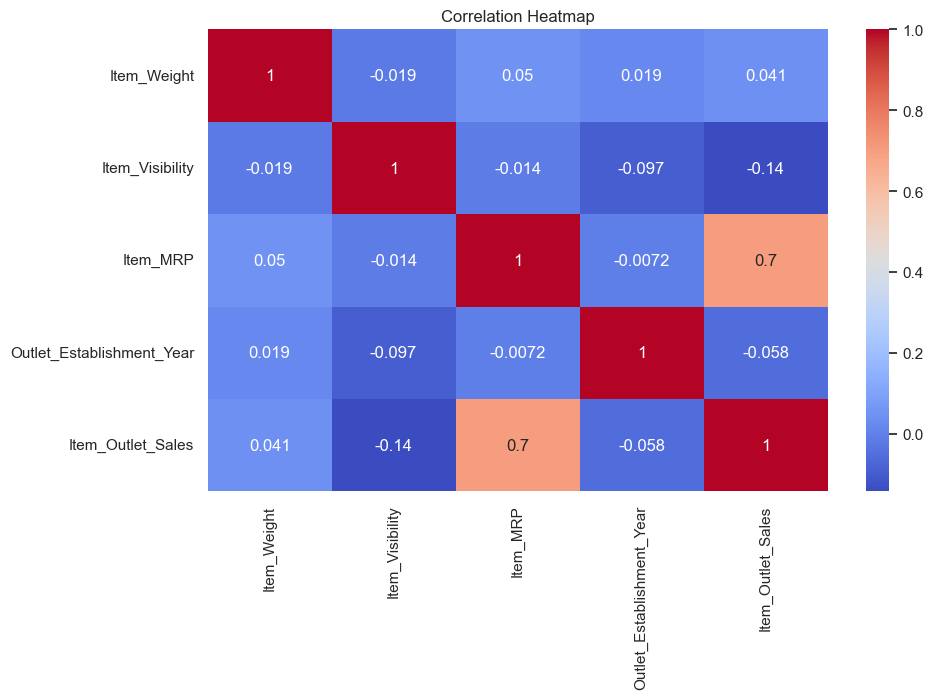

In [387]:
# Filter out non-numeric columns
numerical_features = final_result.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


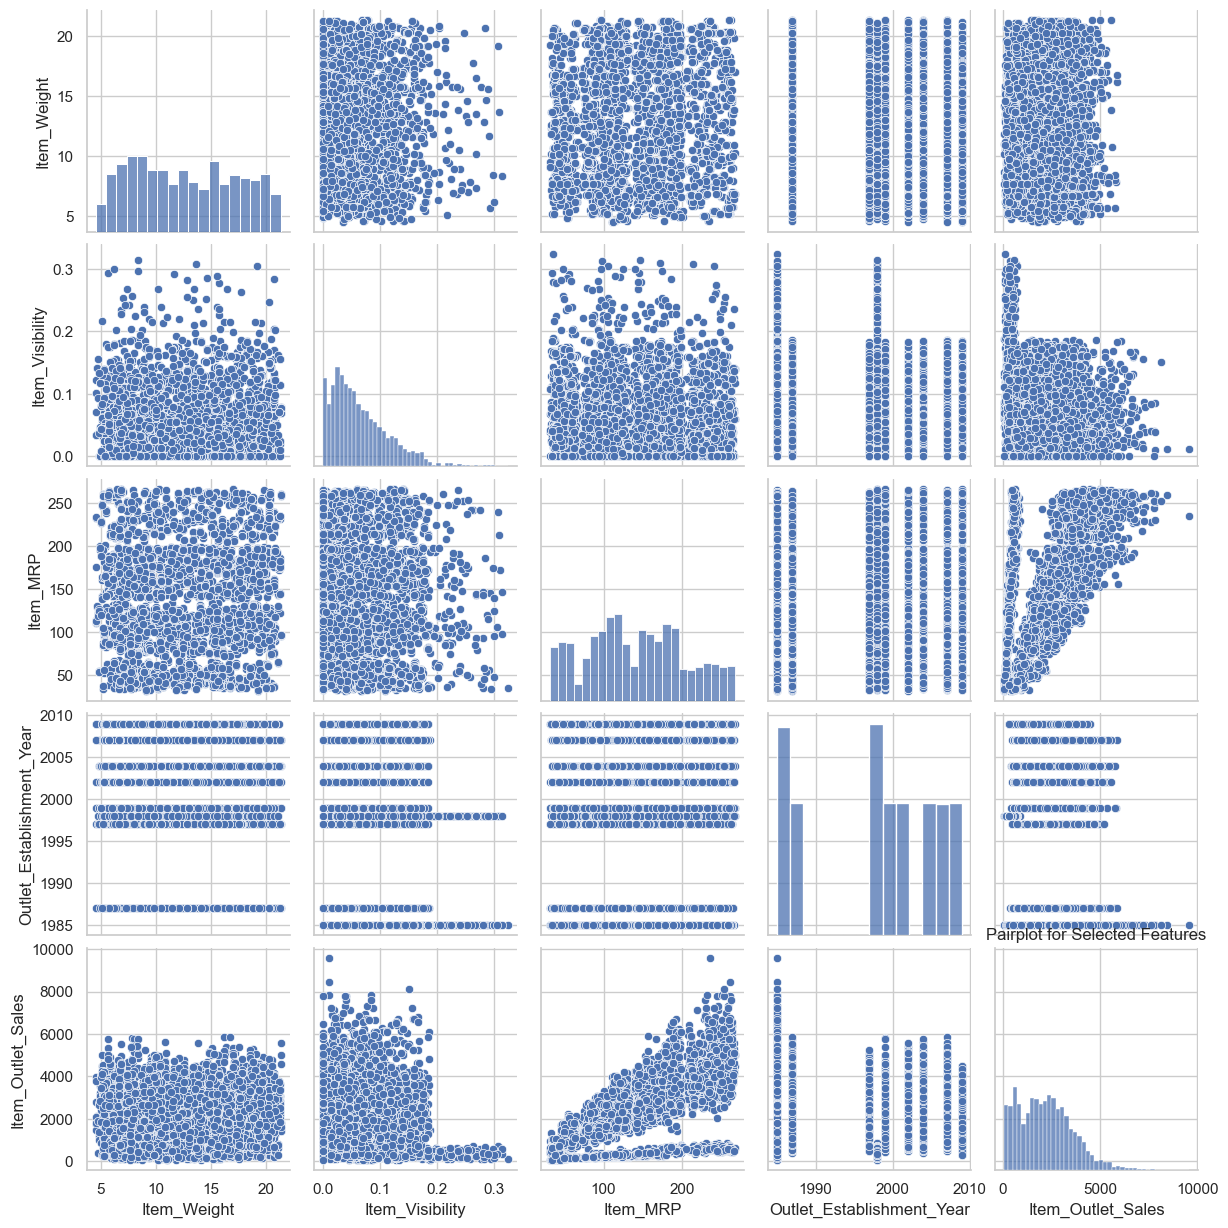

In [388]:
# 8. Pairplot (for selected features)
selected_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
sns.pairplot(final_result[selected_features])
plt.title('Pairplot for Selected Features')
plt.show()

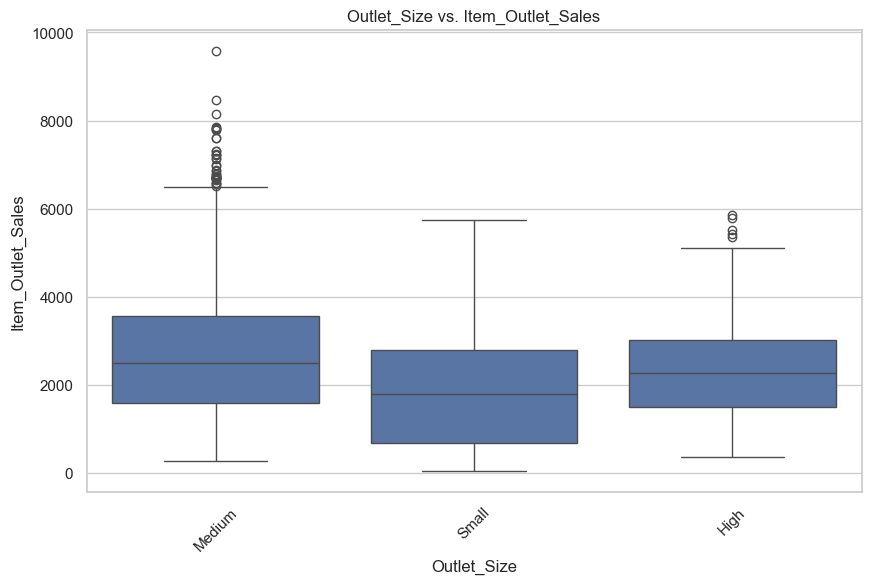

In [389]:
# 9. Box Plots for Item_Outlet_Sales and Outlet_Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=final_result)
plt.title('Outlet_Size vs. Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.show()

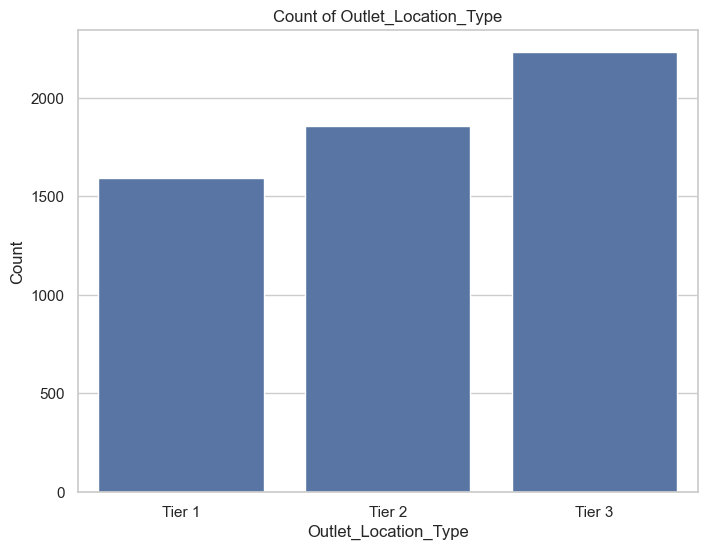

In [390]:
# 10. Countplot for Outlet_Location_Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Outlet_Location_Type', data=final_result)
plt.title('Count of Outlet_Location_Type')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Count')
plt.show()

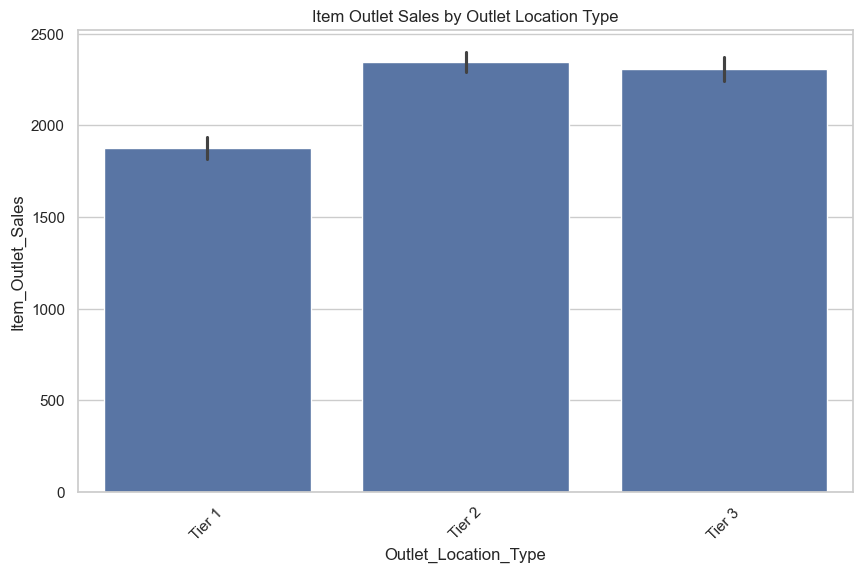

In [391]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=final_result)
plt.title('Item Outlet Sales by Outlet Location Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

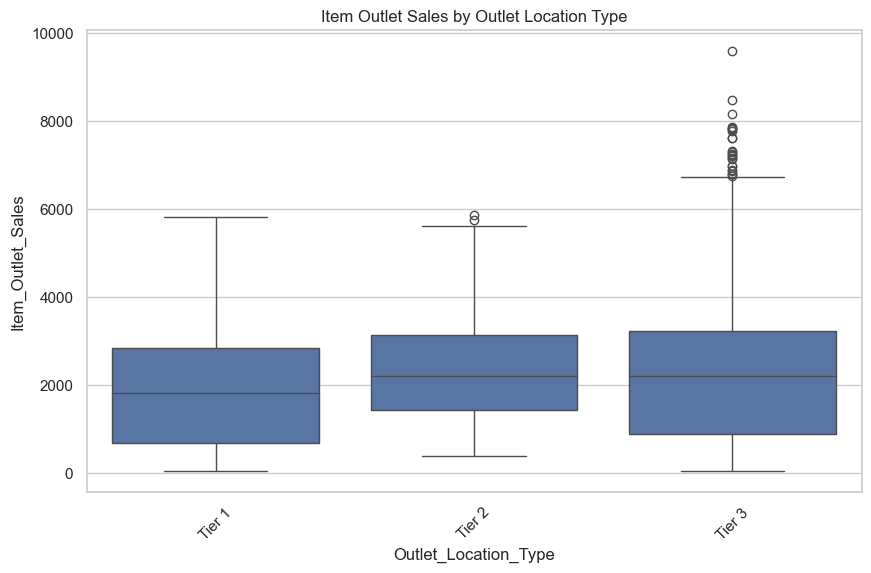

In [392]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=final_result)
plt.title('Item Outlet Sales by Outlet Location Type')
plt.xticks(rotation=45)
plt.show()

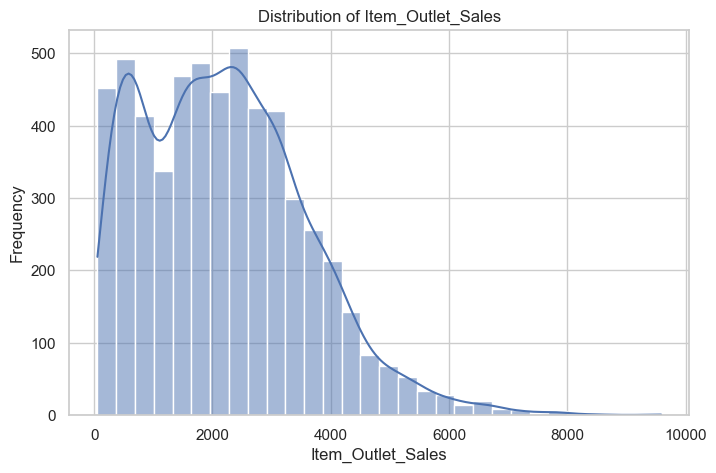

In [393]:
# Histogram of 'Item_Outlet_Sales'

plt.figure(figsize=(8, 5))
sns.histplot(final_result['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()


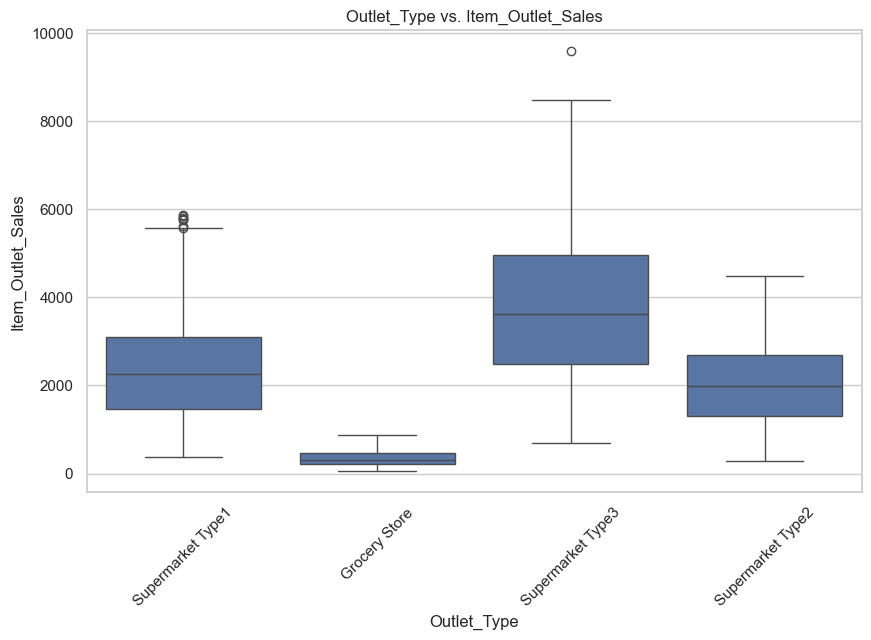

In [394]:
# Boxplot of 'Outlet_Type' vs. 'Item_Outlet_Sales'

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=final_result)
plt.title('Outlet_Type vs. Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()


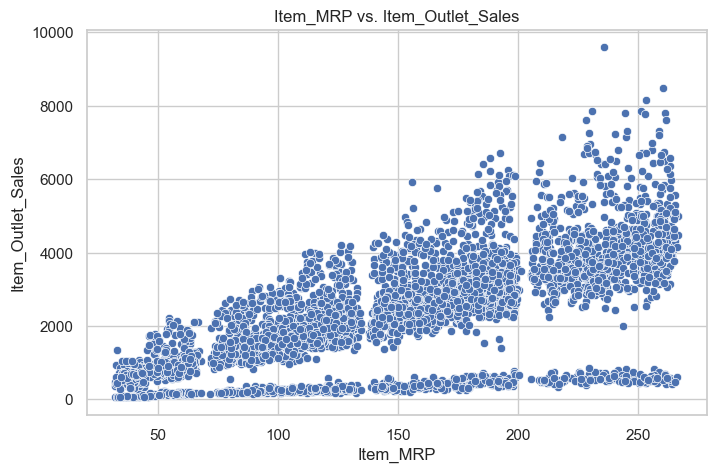

In [395]:
# Scatter Plot of 'Item_MRP' vs. 'Item_Outlet_Sales'

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=final_result)
plt.title('Item_MRP vs. Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()


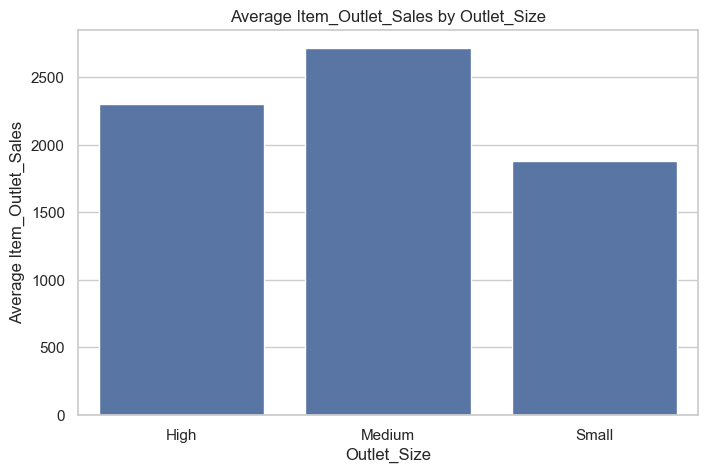

In [396]:
# Bar Plot of 'Outlet_Size' vs. Average 'Item_Outlet_Sales'

plt.figure(figsize=(8, 5))
avg_sales_by_size = final_result.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().reset_index()
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=avg_sales_by_size)
plt.title('Average Item_Outlet_Sales by Outlet_Size')
plt.xlabel('Outlet_Size')
plt.ylabel('Average Item_Outlet_Sales')
plt.show()


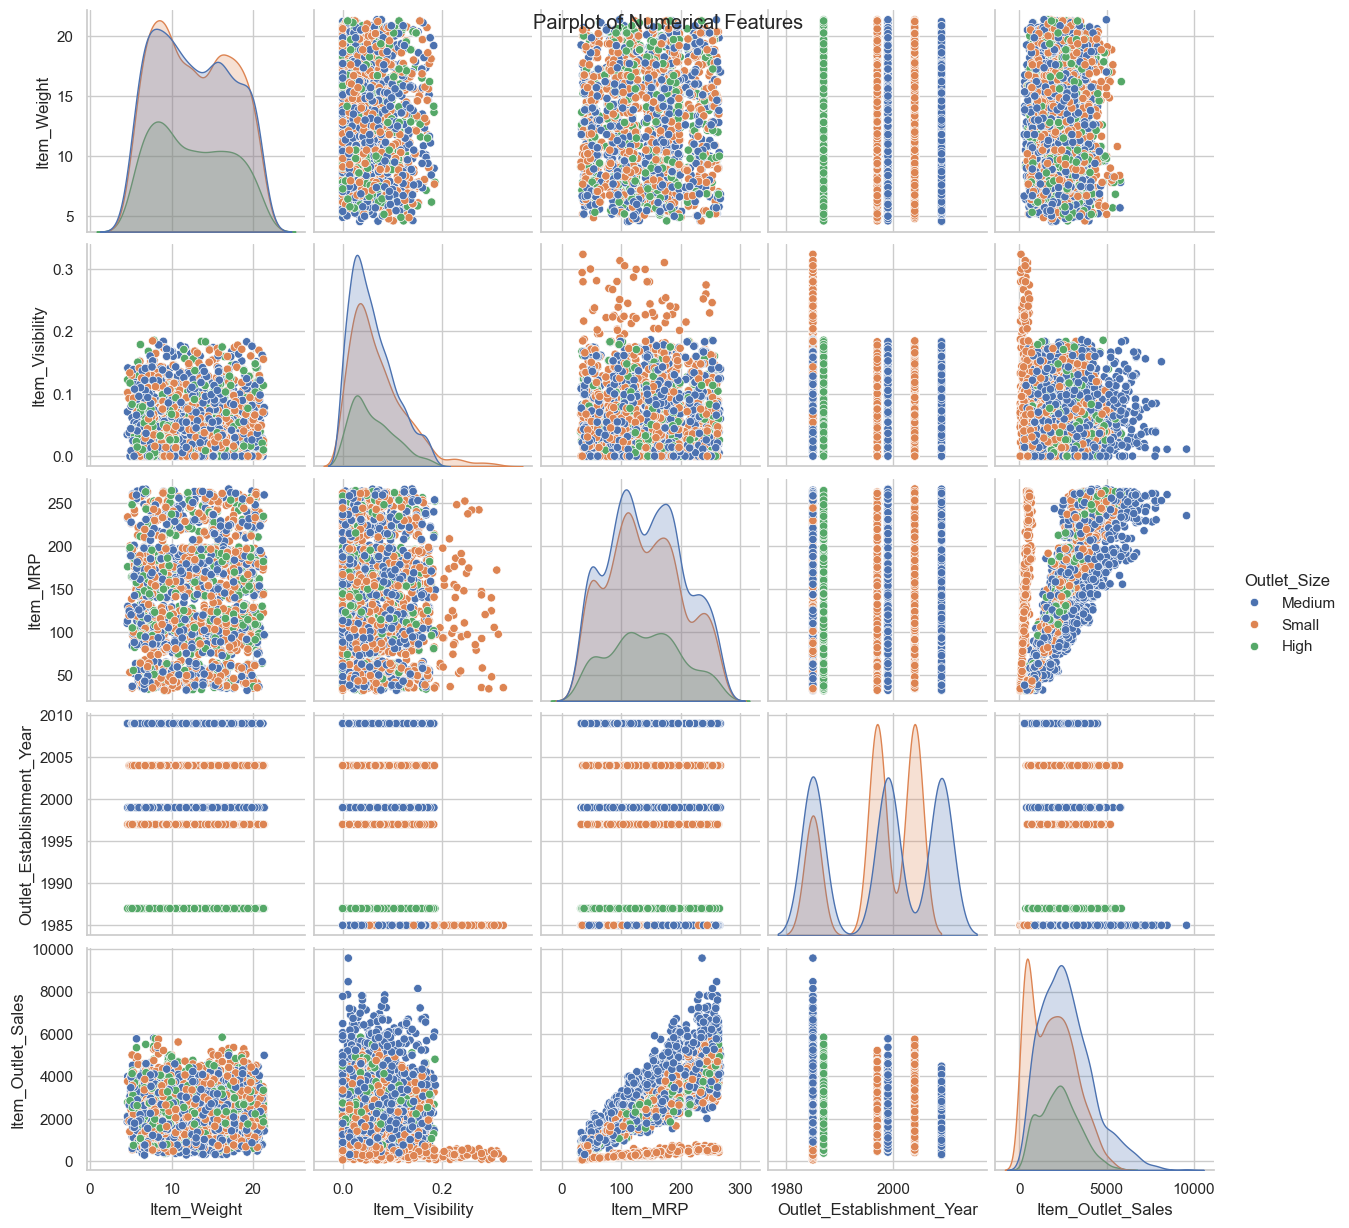

In [397]:
# Pairplot of Numerical Features

sns.pairplot(final_result, vars=numerical_features.columns, hue='Outlet_Size')
plt.suptitle('Pairplot of Numerical Features')
plt.show()


# BigMart Sales Prediction - My Task Conclusion and Insights

## Introduction
In this task, I had the opportunity to work on the BigMart Sales Prediction problem, aiming to predict the sales of items in BigMart stores based on various features. I followed a comprehensive data analysis and modeling approach, leveraging machine learning techniques to create predictive models.

## Data Preprocessing
### Handling Missing Values
I began by loading and exploring the provided datasets, which included both training and testing data. During this exploration, I identified missing values in two key columns, namely 'Item_Weight' and 'Outlet_Size.' To address this, I employed the following steps:
- Filled missing values in the 'Item_Weight' column with the mean of the column.
- For the 'Outlet_Size' column, I filled the missing values with the mode.
This ensured that the datasets were devoid of any missing values after this process.

### Exploratory Data Analysis (EDA)
To gain a deeper understanding of the data, I conducted an exploratory data analysis. I utilized various libraries, including `pandas-profiling`, `klib`, and `seaborn`, to:
- Visualize data distributions, correlations, and patterns.
- Uncover insights into the dataset's characteristics.

## Feature Engineering
As part of feature engineering, I implemented the following actions:
- Dropped unnecessary columns, including 'Item_Identifier' and 'Outlet_Identifier.'
- Applied label encoding to convert categorical variables into numerical representations.
- Split the data into training and testing sets and standardized the features.

## Model Building
For modeling, I trained multiple regression models, including XGBoost, Random Forest, Lasso Regression, and Ridge Regression. I also tuned the hyperparameters for the Random Forest model using grid search. To evaluate the models' performance, I employed metrics such as RMSE and R-squared.

## Model Comparison
I conducted a thorough comparison of the models' performance on a validation set, yielding the following results:
- XGBoost RMSE: 1031.61, R-squared: 0.6085
- Random Forest RMSE: 412.57, R-squared: 0.9374 (Best)
- Lasso Regression RMSE: 1207.25, R-squared: 0.4638
- Ridge Regression RMSE: 1209.35, R-squared: 0.4619

## Insights and Conclusions
1. **Random Forest Outperforms**: Among the models tested, the Random Forest model demonstrated the best performance, boasting the lowest RMSE and the highest R-squared value. This indicates that Random Forest is the most suitable model for predicting BigMart sales.

2. **Feature Importance**: The Random Forest model highlighted the importance of various features, with 'Item_MRP' being the most influential predictor of sales. Other features like 'Outlet_Type' and 'Outlet_Establishment_Year' also played significant roles.

3. **Data Preprocessing Matters**: I learned that proper data preprocessing is pivotal for model performance. Addressing missing values, encoding categorical variables, and standardizing features are essential steps in this process.

4. **Exploratory Data Analysis (EDA)**: EDA was instrumental in uncovering valuable insights about the dataset, including data distributions, correlations, and patterns. It played a crucial role in guiding feature selection and engineering decisions.

5. **Model Comparison**: It's imperative to compare multiple models to identify the one that best fits the data and provides the most accurate predictions.

In summary, my analysis and modeling efforts culminated in the development of an effective predictive model using Random Forest. The insights gleaned from this analysis can assist BigMart in making informed decisions to optimize sales and gain a deeper understanding of the factors influencing their business.

In [398]:
df_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
   